<a href="https://colab.research.google.com/github/vidya715/Vidya-jagtap-/blob/main/prasunt_task05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

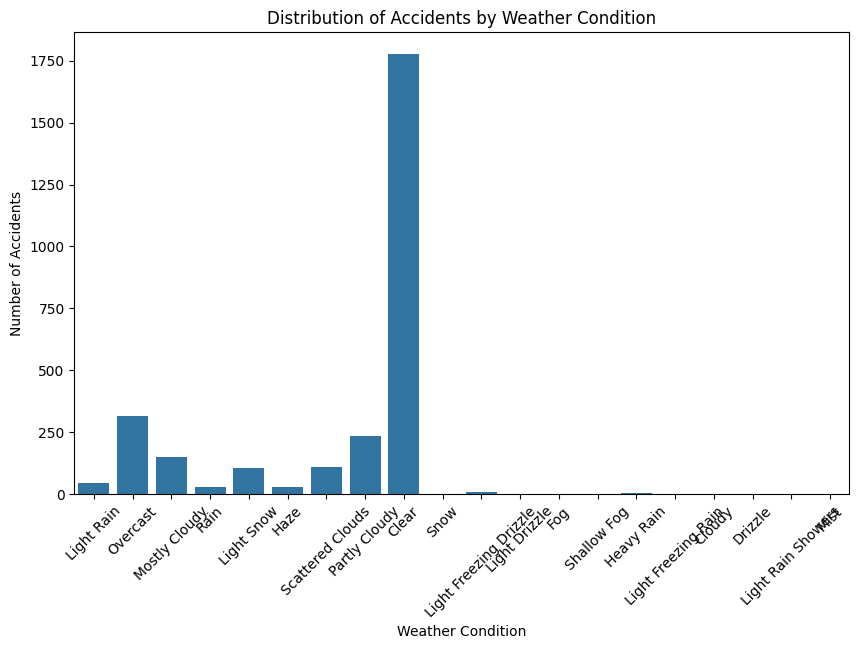

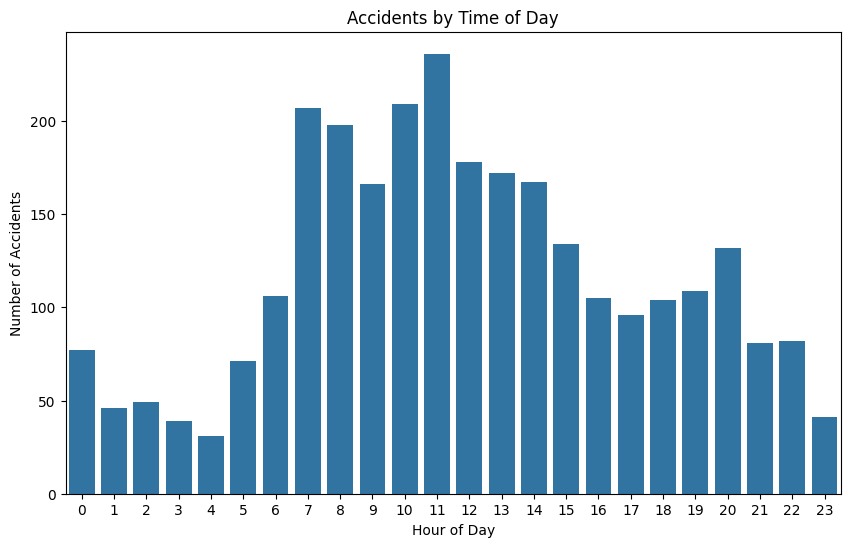

Cleaned data saved to /content/cleaned_US_Accidents_March23.csv


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# Step 1: Read the CSV file into a DataFrame
file_path = "/content/US_Accidents_March23.csv"  # Adjust the path according to your actual file location
df = pd.read_csv('/content/US_Accidents_March23.csv')

# Step 2: Basic Data Exploration and Cleaning
# Display the first few rows of the DataFrame
print(df.head())

# Check the structure and data types of columns
print(df.info())

# Step 3: Data Cleaning (if necessary)
# For example, drop duplicates
df.drop_duplicates(inplace=True)

# Step 4: Exploratory Data Analysis (EDA)

# Example 1: Distribution of accidents by road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df)
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Example 2: Visualize accident hotspots (using a sample due to large dataset)
# Create a base map centered on the mean latitude and longitude
map_accidents = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

# Add markers for a sample of accidents
for i, row in df.sample(1000).iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']]).add_to(map_accidents)

# Save the map as an HTML file
map_accidents.save('/content/accident_hotspots.html')

# Example 3: Time analysis - accidents by hour of day
df['Start_Time'] = pd.to_datetime(df['Start_Time'])  # Convert Start_Time to datetime if not already
df['Hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Step 5: Save or export any processed data or visualizations as needed

# Optionally, save the cleaned DataFrame to a new CSV file
# Specify the directory path where you want to save the file
directory = "/content/"
if not os.path.exists(directory):
    os.makedirs(directory)

cleaned_file_path = "/content/cleaned_US_Accidents_March23.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")
